# Dataset Analysis

Load the file

In [1]:
import pandas as pd 

data = pd.read_csv('../../resources/data/fer2013.csv')
#check data shape and data format
print(data.shape)
data.head(5)

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [2]:
#check usage values
#80% training, 10% validation and 10% test
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [3]:
#check target labels
emotions_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotions_counts = data['emotion'].value_counts(sort=False).reset_index()
emotions_counts.columns = ['emotion', 'number']
emotions_counts['emotion'] = emotions_counts['emotion'].map(emotions_map)
emotions_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


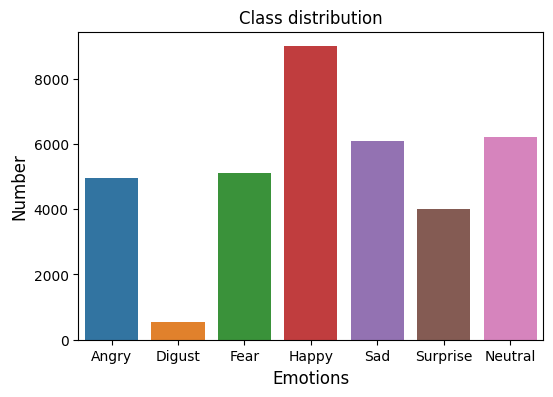

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar graph of the class distributions
plt.figure(figsize=(6,4))
sns.barplot(x=emotions_counts.emotion, y=emotions_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

## Converting and get images

In [5]:
import numpy as np

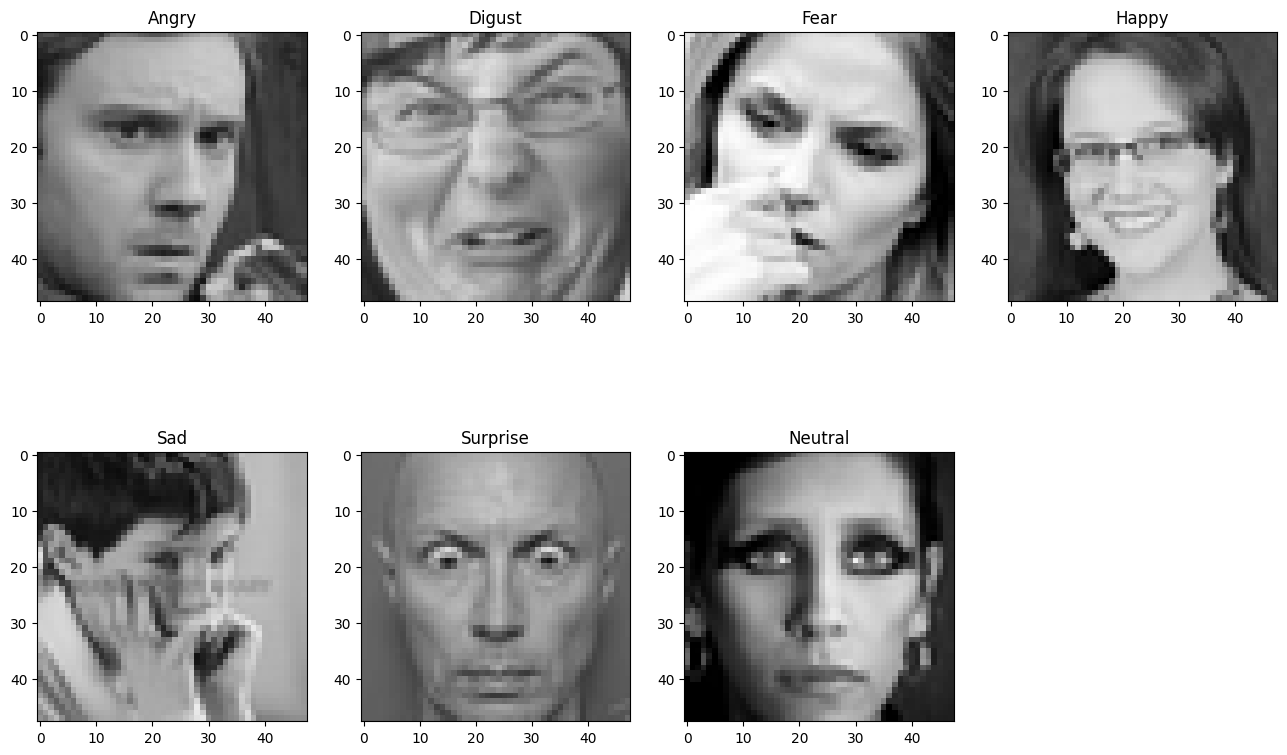

In [6]:
def row2image(row):
    pixels, emotion = row['pixels'], emotions_map[row['emotion']]
    image = np.array(pixels.split())
    image = image.reshape(48,48)
    return np.array(image.astype(np.uint8)), emotion

plt.figure(0, figsize=(16,10))
for i in range(7):
    face = data[data['emotion'] == i].iloc[0]
    img, emotion = row2image(face)
    plt.subplot(2,4,i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(emotion)

plt.show()  

## Distribution

In [7]:
#split data into training, validation and test set
data_train = data[data['Usage']=='Training'].copy()
data_val = data[data['Usage']=='PublicTest'].copy()
data_test = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


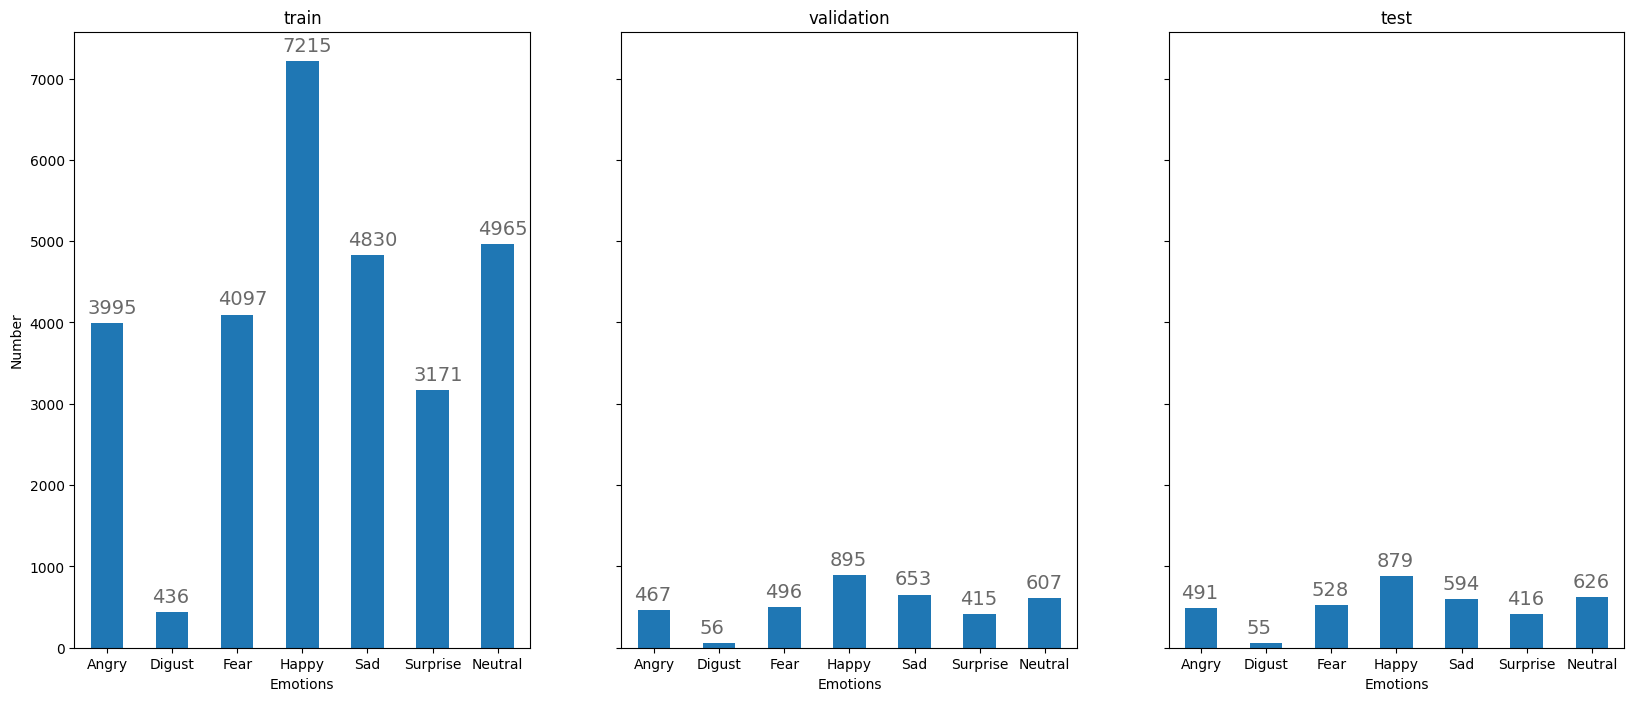

In [8]:
# barplot class distribution of train, val and test

def setup_axe(axe, df, title):
    counts = df['emotion'].value_counts().sort_index(ascending=True)
    counts.plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotions_map.values())
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
        # get_x pulls left or right; get_height pushes up or down
        axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',
                    rotation=0)

   
_, axes = plt.subplots(1,3, figsize=(20,8), sharey=True)
setup_axe(axes[0],data_train,'train')
setup_axe(axes[1],data_val,'validation')
setup_axe(axes[2],data_test,'test')
plt.show()

# Processing

I save the images in folders for later using. I will use the `ImageDataGenerator` from keras.

In [9]:
import os
from PIL import Image

base_path = "../../resources/data/emotions"
usage_map = {"Training": "train", "PublicTest": "train", "PrivateTest": "test"}

for usage, dataset_type in usage_map.items():
    os.makedirs(os.path.join(base_path, dataset_type), exist_ok=True)
    dataset = data[data['Usage'] == usage]
    for label_num, label_name in emotions_map.items():
        os.makedirs(os.path.join(base_path, dataset_type, label_name), exist_ok=True)
        emotion_ds = dataset[dataset["emotion"] == label_num]
        for i in range(len(emotion_ds)):
            np_img = row2image(emotion_ds.iloc[i])[0]
            img = Image.fromarray(np_img)
            img.save(os.path.join(base_path, dataset_type, label_name, f"im{i}.png"))
            print(f"Saved img #{i} - emotion {label_name}")
            
        

Saved img #0 - emotion Angry
Saved img #1 - emotion Angry
Saved img #2 - emotion Angry
Saved img #3 - emotion Angry
Saved img #4 - emotion Angry
Saved img #5 - emotion Angry
Saved img #6 - emotion Angry
Saved img #7 - emotion Angry
Saved img #8 - emotion Angry
Saved img #9 - emotion Angry
Saved img #10 - emotion Angry
Saved img #11 - emotion Angry
Saved img #12 - emotion Angry
Saved img #13 - emotion Angry
Saved img #14 - emotion Angry
Saved img #15 - emotion Angry
Saved img #16 - emotion Angry
Saved img #17 - emotion Angry
Saved img #18 - emotion Angry
Saved img #19 - emotion Angry
Saved img #20 - emotion Angry
Saved img #21 - emotion Angry
Saved img #22 - emotion Angry
Saved img #23 - emotion Angry
Saved img #24 - emotion Angry
Saved img #25 - emotion Angry
Saved img #26 - emotion Angry
Saved img #27 - emotion Angry
Saved img #28 - emotion Angry
Saved img #29 - emotion Angry
Saved img #30 - emotion Angry
Saved img #31 - emotion Angry
Saved img #32 - emotion Angry
Saved img #33 - emot